## Intrusive Phone Calls

### Overview
In a world with modern technology, scammers have a variety of tools with which they can trick individuals who don't know any better into giving up their money or personal information. Phone calls is one medium in particular that scammers use often. Scammers can be anywhere around the world calling people's home phones or personal phones at any time of the day and will use whatever tactics they can to turn a profit. Thus, everyone should be aware of these scammers and have an idea of how they can best protect themselves.

Using data on the number of Do Not Call complaints (organized by state) made to the FTC over the past 5 years, we look to see if there is an optimal time to warn people about instrusive phone calls.

### Names
* Felix Chu ()
* Danny Fung ()
* Peter Huang ()
* Dan Tran (A13684358)
* Leon Wu (A11988491) - **Overview, Background & Prior Work, Ethics & Privacy**

### Research Question
When should people be more aware of scam calls, depending on the time of the year and where they live, in order for them to not get scammed?

At what time of the year would it be most effective to inform people about the dangers of scam calls?

### Background & Prior Work
#### Background
* Scam callers can spoof their caller ID to make it look like they are from your area.
* Scam callers can target victims based on certain demographics such as race.
* Scam callers sometimes do not take people off their call lists when requested.

#### Prior Work
We found two projects similar to ours: **The Large-Scale Analysis of Technical Support Scams** and **The Correlates of Susceptibility to Scams in Older Adults Without Dementia**.

**The Large-Scale Analysis of Technical Support Scams** study learned that scammers abuse specific browser APIs to make it hard for users to navigate away from a technical support scam page, identified the social engineering techniques used, the remote administration tools abused, and the amount of money that scammers are charging. Technical support scammers were also based in call centers in English-speaking countries with low wages.

**The Correlates of Susceptibility to Scams in Older Adults Without Dementia** study found that the oldest old, persons with lower levels of cognitive function, lower psychological well being, and poorer health and financial literacy appeared to be the most susceptible to scams, independent of the level of education and income. There was no difference in susceptibility between males and females. This study identifies a number of factors that may put older adults at high risk of falling prey to scams, and suggests at least two modifiable factors—health and financial literacy and well-being—as potential targets for interventions to prevent victimization of older persons. The most robust psychosocial correlate of susceptibility to scams was psychological well-being. This indicates that positive functioning and outlook on one's life is associated with being less susceptible to being taken advantage of by a scammer.

#### References
1. https://arxiv.org/pdf/1607.06891.pdf
2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3916958/pdf/nihms509695.pdf

### Hypothesis
People should be more aware of scam calls during the winter holidays. Our hypothesis is that scam callers target people the most during the winter holidays because many individuals are saving up for or purchasing gifts for loved ones. This is an optimal time to market a scam to people in the form of a gift.

### Dataset(s)
##### Dataset 1 - 2010_to_2015_dnc_complaints_by_month

* link to dataset: https://www.ftc.gov/site-information/open-government/data-sets
* This dataset contains the number of total complants (combination of recorded messages and requested entities), recorded messages, and requested entities. Each data row is the month of that year, with each cell being the total number of the type of complaints in that given month and year. The dataset was created by going to each year from 2010-2015 and combining them into a single file through excel sheets.
* For our research question, we chose to use: 
    1. Month
    2. Total number of complaints
* Problems with this dataset:
    1. It is confined to the United States only.
    2. Data for more recent years couldn't be included because it doesn't show up in their recent excel sheets.
    3. It doesn't include more specific locations, such as states or cities. 

### Setup

In [19]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

### Data Cleaning
*describe data cleaning steps here*

In [20]:
df_2018_dnc_state_complaints_5yr = pd.read_csv("csv_files/2018_DNC_State_Complaints_5yr.csv")
df_2018_dnc_state_complaints_calltype = pd.read_csv("csv_files/2018_DNC_State_Complaints_by_CallType.csv")
df_2018_dnc_state_complaints_topic = pd.read_csv("csv_files/2018_DNC_State_Complaints_by_Topic.csv")
df_2017_dnc_state_complaints_calltype = pd.read_csv("csv_files/2017_DNC_State_Complaints_by_CallType.csv")
df_2017_dnc_state_complaints_topic = pd.read_csv("csv_files/2017_DNC_State_Complaints_by_Topic.csv")
df_2010_to_2015_dnc_complaints_by_month = pd.read_csv("csv_files/2010_to_2015_dnc_complaints_by_month.csv")

### Data Analysis & Results
*include cells that describe the steps in data analsis*

In [44]:
print(df_2010_to_2015_dnc_complaints_by_month['Unnamed: 0'])

0     Oct-10
1     Nov-10
2     Dec-10
       ...  
57    Jul-15
58    Aug-15
59    Sep-15
Name: Unnamed: 0, Length: 60, dtype: object


Jan: 1367986
Feb: 1397948
Mar: 1540240
Apr: 1464242
May: 1409354
Jun: 1419308
Jul: 1474047
Aug: 1549973
Sep: 1525764
Oct: 1247479
Nov: 1165743
Dec: 1119611


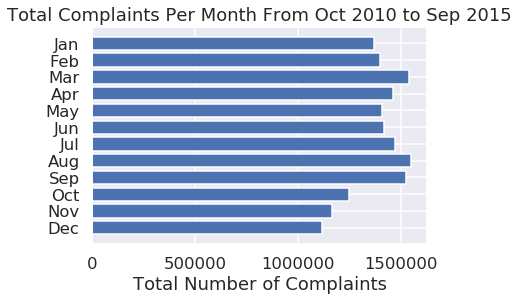

In [63]:
i = 0
months = df_2010_to_2015_dnc_complaints_by_month['Unnamed: 0']
month_arr = [['Jan', 0], ['Feb', 0], ['Mar', 0], ['Apr', 0], ['May', 0], ['Jun', 0], ['Jul', 0], ['Aug', 0], ['Sep', 0], ['Oct', 0], ['Nov', 0], ['Dec', 0]]
performance = []
for month in months:
    for com_month in month_arr:
        if(month[0:3] == com_month[0]):
            str_in = df_2010_to_2015_dnc_complaints_by_month['Total Complaints'][i].replace(',', '')
            com_month[1] += int(str_in)
    i = i + 1
i = 0
for month in month_arr:
    performance.insert(0,month[1])
    print(str(month[0])+": "+str(month[1]))
objects = ('Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan')
y_pos = np.arange(len(objects))
plt.barh(y_pos, performance, align='center', alpha=1)
plt.yticks(y_pos, objects)
plt.xlabel('Total Number of Complaints')
plt.title('Total Complaints Per Month From Oct 2010 to Sep 2015')

plt.show()

### Ethics & Privacy
The most concerning ethical consideration for our study is that our data analysis could potentially make it easier for scammers to find victims. Since we analyze our data to find the best times for scammers to strike, this may give scammers hints for when they should operate. We also acknowledge the fact that all the data we use is self-reported. This means that our analysis may not necessarily be representative of a particular group since some may choose to not report calls. Our data also has some bias in the sense that it is aggregated by state. The data is not nearly as narrow if compared to data by cities. We are unable to take into account whether population density could affect the number of reported calls. For instance, urban areas might have a higher number of reported calls over rural areas.

In terms of privacy, data from our sources is anonymized. **TODO: fill in how this data is anonymized (check for sex, age, etc)**

### Conclusion & Discussion
*fill in discussion information here*